# Capstone Project on Online Retail Dataset

###  Problem Statement-
The goal of this project is to analyze and understand the sales data from an online retail store. By conducting a comprehensive exploratory data analysis (EDA), we aim to uncover patterns, trends, and insights that can help improve business decisions related to inventory management, marketing strategies, and customer behavior. Additionally, we seek to build predictive models that can forecast future sales and identify potential high-value customers.

###  Dataset Description-
The dataset is a transactional dataset of an online retail store. The data includes all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### Features in the Dataset-
1. **InvoiceNo**: Invoice number. A unique number assigned to each transaction. Nominal data.
2. **StockCode**: Product (item) code. A unique number assigned to each distinct product. Nominal data.
3. **Description**: Product (item) name. Nominal data.
4. **Quantity**: The quantities of each product (item) per transaction. Numeric data.
5. **InvoiceDate**: The date and time when the transaction was generated. DateTime data.
6. **UnitPrice**: Unit price. Numeric data.
7. **CustomerID**: Customer number. A unique number assigned to each customer. Nominal data.
8. **Country**: The name of the country where the customer resides. Nominal data.

### Steps for Analysis-
1. **Data Loading and Preparation**: Load the dataset and prepare it for analysis.
2. **Checking for Missing Values**: Identify and handle missing values appropriately.
3. **Descriptive Statistics**: Calculate basic statistics to understand the distribution and central tendencies of the data.
4. **Data Visualization**: Create various visualizations to explore the data and gain insights.
5. **Feature Engineering**: Create new features or transform existing ones to improve the performance of machine learning models.
6. **Machine Learning Models**: Apply various machine learning models to predict future sales or classify customer behavior.
7. **Model Evaluation**: Evaluate the models using appropriate metrics and cross-validation techniques.

### Let's conduct a comprehensive Exploratory Data Analysis (EDA) on the provided dataset. The steps will include:

1. Data Loading and Preparation
2. Checking for Missing Values and Handling Them
3. Descriptive Statistics
4. Visualizing the Data
   

# Exploratory Data Analysis

### 1. Data Loading and Preparation

In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_csv('Online Retail Data Set.csv', encoding='ISO-8859-1')

In [3]:
# Displaying the first few rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
# To know how much rows and columns are there in the dataset
print("Number of rows in dataset is: ", df.shape[0])
print("Number of columns in dataset is: ", df.shape[1])

Number of rows in dataset is:  541909
Number of columns in dataset is:  8


Now next step is data cleaning and we can get insights by using df.info().

In [5]:
# To get all the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


By this,we get all the information about each features in the dataset,the column name,non null values and its datatypes. Now,from the above output we can see that there are some null values in Description and CustomerID features and the datatype of InvoiceDate is object which we need to convert into datetime format. So,our next steps involves checking for null values and changing the datatype.

In [6]:
# To check the datatypes of the features in the dataset
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

From the above output,we can see that the datatype of InvoiceDate is in object datatype but it should be in datetime datatype. So, we will change the datatype of InvoiceDate feature into datetime format.

In [7]:
# Filling missing CustomerID with 0 and convert to int64
df['CustomerID'] = df['CustomerID'].fillna(0).astype('int64')
print(df['CustomerID'].isna().sum())

0


In [8]:
# To change the datatype of the features in the dataset
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],errors='coerce')
df['CustomerID'] = df['CustomerID'].astype('int64')

In [9]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

We can see that the datatype of InvoiceDate and CustomerID has been changed to datetime format and int64 respectively.

In [10]:
# To check how many columns are there in the dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

From the above output,we get to know that there are 8 columns in the dataset. We can also rename the column in the dataset too. Lets, rename StockCode to SKU in the next step.

In [11]:
# To rename columns in the dataset
df=df.rename(columns={'StockCode':'SKU'})

In [12]:
df.head()

,InvoiceNo,SKU,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom


We can see that the column name StockCode has been changed to SKU.

### 2. Checking for Missing Values and Handling Them

In [13]:
# To check for null values in true or false condition
pd.isnull(df)

,InvoiceNo,SKU,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


From the above output,we can see how much null values are there in each features of the dataset in true or false condition. But we are not getting a clear picture of how much null values are there in all the features of the dataset,so our next step involves checking for total null values in each features of the dataset.

In [14]:
# To check for null values in each features of the dataset
missing_values=pd.isnull(df).sum()
print("Missing Values:\n", missing_values)

Missing Values:
 InvoiceNo           0
SKU                 0
Description      1454
Quantity            0
InvoiceDate    308950
UnitPrice           0
CustomerID          0
Country             0
dtype: int64


From the above output, we get to know that there are 1454 null values in Description and 308950 null values in InvoiceDate features of the dataset. Now, our next step will be to remove all the null values in the dataset.

Text(0.5, 1.0, 'Percentage of missing values per columns')

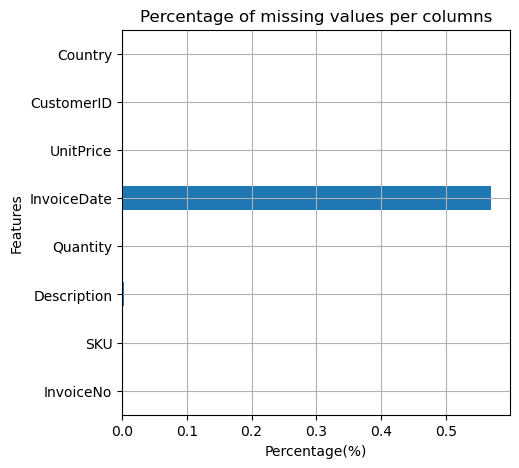

In [15]:
#To see the percentage of missing values in the dataset
plt.figure(figsize=(5, 5))

df.isnull().mean(axis=0).plot.barh()

plt.grid()
plt.xlabel("Percentage(%)")
plt.ylabel("Features")
plt.title("Percentage of missing values per columns")

In [16]:
# Dropping null values in the dataset
df.dropna(inplace=True)

In [17]:
# Checking for any other missing values
missing_values_after = pd.isnull(df).sum()
print("Missing Values after dropping rows with missing CustomerID and Description:\n", missing_values_after)

Missing Values after dropping rows with missing CustomerID and Description:
 InvoiceNo      0
SKU            0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Now, we can see that there are no null values in the dataset.

Text(0.5, 1.0, 'Percentage of missing values per columns')

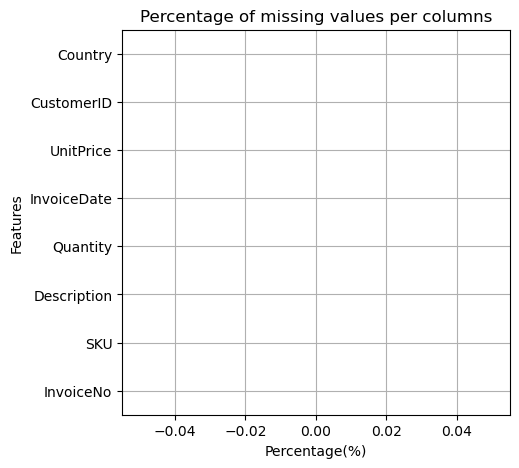

In [18]:
# To see the applied changes through the plot:
plt.figure(figsize=(5, 5))

df.isnull().mean(axis=0).plot.barh()

plt.grid()
plt.xlabel("Percentage(%)")
plt.ylabel("Features")
plt.title("Percentage of missing values per columns")

In [19]:
# Exploring the unique values of each features in the dataset
print('Number of Transactions:',df['InvoiceNo'].nunique())
print('Number of Products:',df['SKU'].nunique())
print('Number of Customers:',df['CustomerID'].nunique())
print('Number of Countries:',df['Country'].nunique())

Number of Transactions: 10481
Number of Products: 3777
Number of Customers: 3126
Number of Countries: 35


### 3. Descriptive Statistics

In [20]:
# Analysing the quantitative data
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,232301.000000,232301.000000
mean,9.475801,4.900634
std,242.624588,135.330661
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.130000
max,80995.000000,38970.000000


From the above output, we can see that there are negative values which means that there are some cancelled orders in the dataset.

In [21]:
# Remove rows with negative or zero quantities and unit prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [22]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,227703.000000,227703.000000
mean,10.516677,3.971867
std,173.871870,46.756512
min,1.000000,0.040000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [23]:
# To determine the percentage of cancelled orders in the dataset
cancelled_orders=df[df['InvoiceNo'].astype(str).str.contains('C')]


In [24]:
# To check how many rows the dataframe contains cancelled orders
print('We have',len(cancelled_orders),'cancelled orders')

We have 0 cancelled orders


In [25]:
# To get the percentage of cancelled orders in total orders
total_orders=df['InvoiceNo'].nunique()
cancelled_numbers=len(cancelled_orders)
print('% of orders cancelled: {:.2f}%'.format(cancelled_numbers / total_orders * 100))

% of orders cancelled: 0.00%


In [26]:
# Splitting InvoiceDate into date and time
df['Date']=df['InvoiceDate'].apply(lambda x:str(x).split(' '))

In [27]:
df.head()

,InvoiceNo,SKU,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,"[2010-01-12, 08:26:00]"
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,"[2010-01-12, 08:26:00]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,"[2010-01-12, 08:26:00]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,"[2010-01-12, 08:26:00]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,"[2010-01-12, 08:26:00]"


In [28]:
df[['Date','Time']]=pd.DataFrame(df['Date'].tolist(),index=df.index)

In the above code, we are creating two new columns after splitting InvoiceDate column so that we have more features in the dataset.

In [29]:
df.head()

,InvoiceNo,SKU,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,2010-01-12,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010-01-12,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,2010-01-12,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010-01-12,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010-01-12,08:26:00


In [30]:
df.dtypes

InvoiceNo              object
SKU                    object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
Date                   object
Time                   object
dtype: object

In [31]:
df['Date']=pd.to_datetime(df['Date'], errors='coerce')
df['Time']=pd.to_datetime(df['Time'], errors='coerce')

C:\Users\karan\AppData\Local\Temp\ipykernel_524\2388038297.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'], errors='coerce')


In the above code,we are changing the datatype of date and time from object to datetime respectively.

In [32]:
df.dtypes

InvoiceNo              object
SKU                    object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
Date           datetime64[ns]
Time           datetime64[ns]
dtype: object

In [33]:
# Making a new column named Amount Spend by multiplying Quantity and UnitPrice.
df['AmountSpend']=df['Quantity']*df['UnitPrice']

In [34]:
df.head()

,InvoiceNo,SKU,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,AmountSpend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,2010-01-12,2024-06-15 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010-01-12,2024-06-15 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,2010-01-12,2024-06-15 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010-01-12,2024-06-15 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010-01-12,2024-06-15 08:26:00,20.34


In [35]:
# Making new columns named year and month
df['Year']=pd.DatetimeIndex(df['InvoiceDate']).year
df['Month']=pd.DatetimeIndex(df['InvoiceDate']).month

In [36]:
df.head()

,InvoiceNo,SKU,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,AmountSpend,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,2010-01-12,2024-06-15 08:26:00,15.30,2010,1
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010-01-12,2024-06-15 08:26:00,20.34,2010,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,2010-01-12,2024-06-15 08:26:00,22.00,2010,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010-01-12,2024-06-15 08:26:00,20.34,2010,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,2010-01-12,2024-06-15 08:26:00,20.34,2010,1


In [37]:
# Rearranging all the columns for easy reference
df=df[['InvoiceNo','InvoiceDate','Date','Time','Month','Year','SKU','Description','Quantity','UnitPrice','AmountSpend','CustomerID','Country']]

In [38]:
df.head()

,InvoiceNo,InvoiceDate,Date,Time,Month,Year,SKU,Description,Quantity,UnitPrice,AmountSpend,CustomerID,Country
0,536365,2010-01-12 08:26:00,2010-01-12,2024-06-15 08:26:00,1,2010,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536365,2010-01-12 08:26:00,2010-01-12,2024-06-15 08:26:00,1,2010,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
2,536365,2010-01-12 08:26:00,2010-01-12,2024-06-15 08:26:00,1,2010,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom
3,536365,2010-01-12 08:26:00,2010-01-12,2024-06-15 08:26:00,1,2010,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom
4,536365,2010-01-12 08:26:00,2010-01-12,2024-06-15 08:26:00,1,2010,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom


In [39]:
# Dropping time column from the dataset
df.drop(columns=['Time'],axis=1,inplace=True)

In [40]:
df.head()

,InvoiceNo,InvoiceDate,Date,Month,Year,SKU,Description,Quantity,UnitPrice,AmountSpend,CustomerID,Country
0,536365,2010-01-12 08:26:00,2010-01-12,1,2010,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536365,2010-01-12 08:26:00,2010-01-12,1,2010,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
2,536365,2010-01-12 08:26:00,2010-01-12,1,2010,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom
3,536365,2010-01-12 08:26:00,2010-01-12,1,2010,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom
4,536365,2010-01-12 08:26:00,2010-01-12,1,2010,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom


### 4. Data Visualization

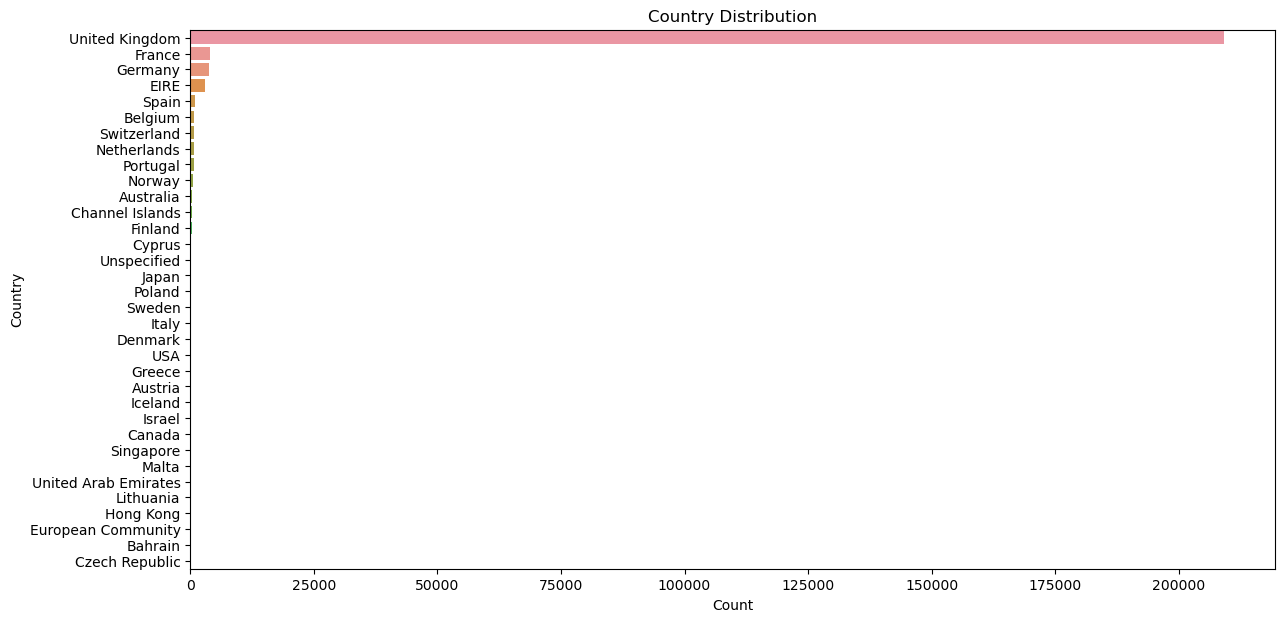

In [41]:
# Distribution of countries
plt.figure(figsize=(14,7))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Country Distribution')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


From the above plot,its quite evident that most of the customers are from United Kingdom followed by France and Germany.

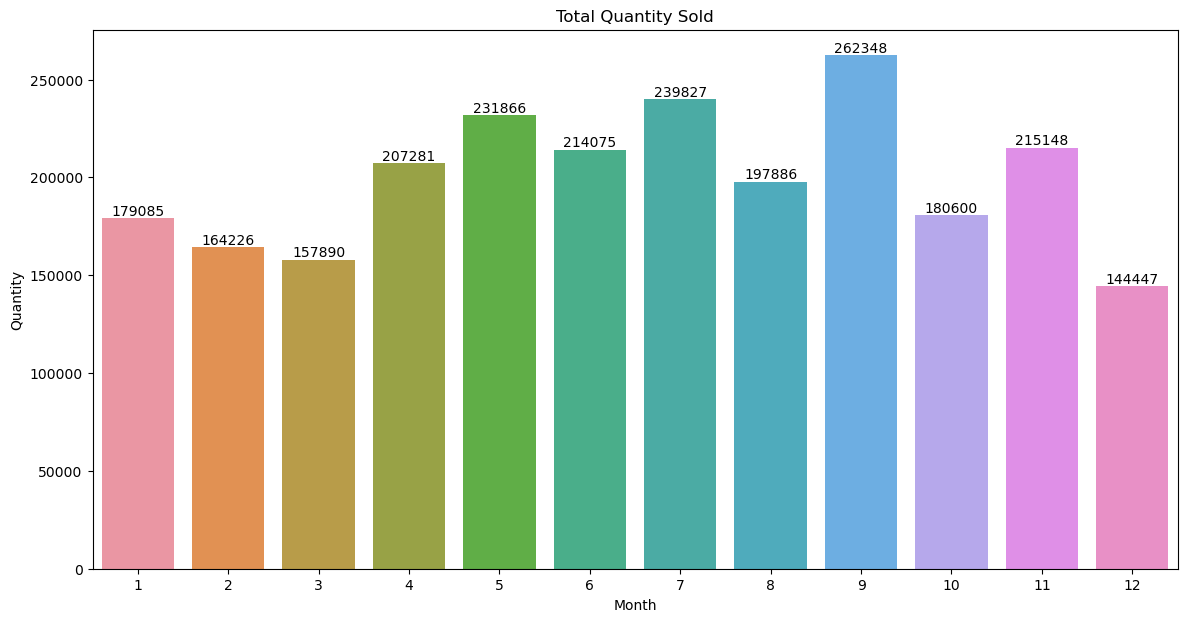

In [42]:
# Monthly sales
monthly_sales = df.groupby('Month')['Quantity'].sum().reset_index()
fig,axes=plt.subplots(figsize=(14,7))
ax=sns.barplot(x='Month',y='Quantity',data=monthly_sales)
ax.set_title('Total Quantity Sold')
for bars in ax.containers:
    ax.bar_label(bars)

From the above graph,we can see that most of quantity were sold in the month of July followed by May,November and June.If we analyse the quantity sold from the month of January,we see that the quantity sold in January was high but it saw a minimal drop in the month of Febraury and went on to rise from the month of March to May. And,then we see that the quantity sold drops down from July to October.But we see a sharp rise in the month of November and then a drastic drop in the month of December. 

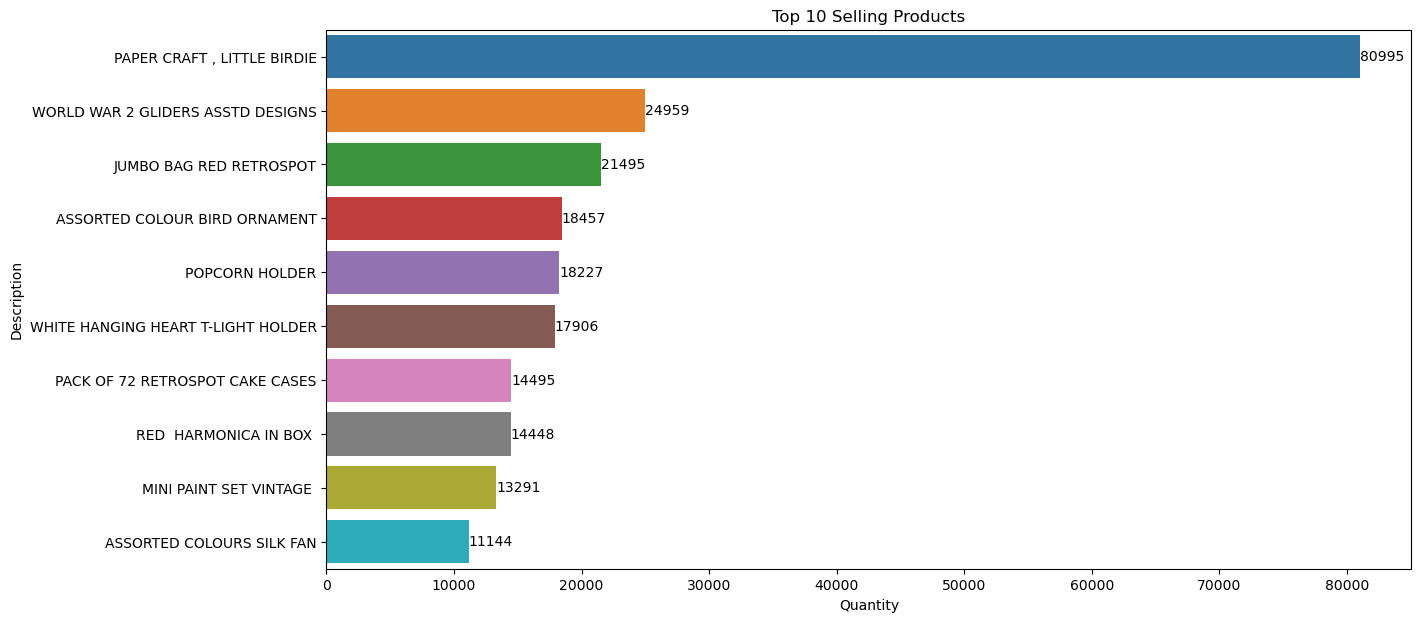

In [43]:
# Top 10 Selling Products
top_products = df.groupby(['Description'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False).head(10)
fig,axes=plt.subplots(figsize=(14,7))
ax= sns.barplot(y='Description',x='Quantity',data=top_products)
ax.set_title('Top 10 Selling Products')
for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Amount Spend per month')

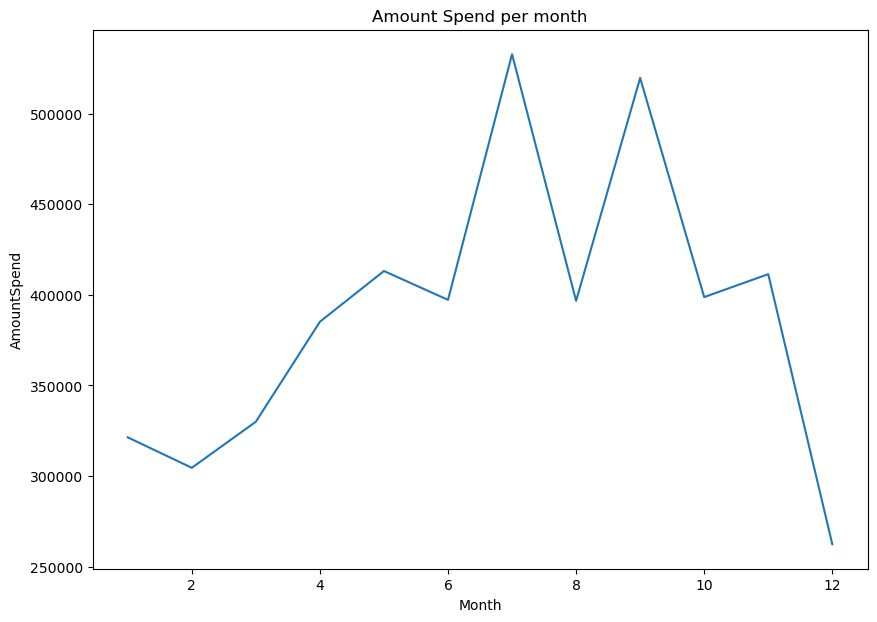

In [44]:
# Amount Spend per month
df_amountspend=df.groupby('Month')['AmountSpend'].sum().reset_index()
# Plotting a lineplot for Amount Spend per month
fig,axes=plt.subplots(figsize=(10,7))
ax=sns.lineplot(x='Month',y='AmountSpend',data=df_amountspend,sort=False)
ax.set_title('Amount Spend per month')

Text(0.5, 1.0, 'Monthly Growth Rate')

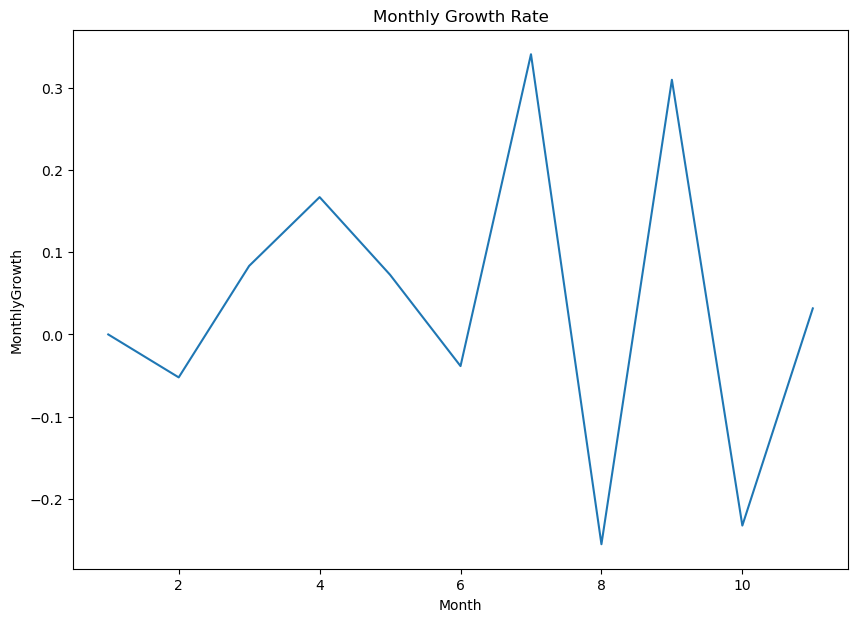

In [45]:
# Monthly growth rate
df_amountspend['MonthlyGrowth']=df_amountspend['AmountSpend'].pct_change()

# Now we will drop the 12th month 
df_amountspend=df_amountspend.loc[df_amountspend['Month']!=12]

# Replacing NaN value with zero
df_amountspend['MonthlyGrowth']=df_amountspend['MonthlyGrowth'].fillna(0)

#Plotting a lineplot for monthly growth rate
fig,axes=plt.subplots(figsize=(10,7))
ax=sns.lineplot(x='Month',y='MonthlyGrowth',data=df_amountspend,sort=False)
ax.set_title('Monthly Growth Rate')

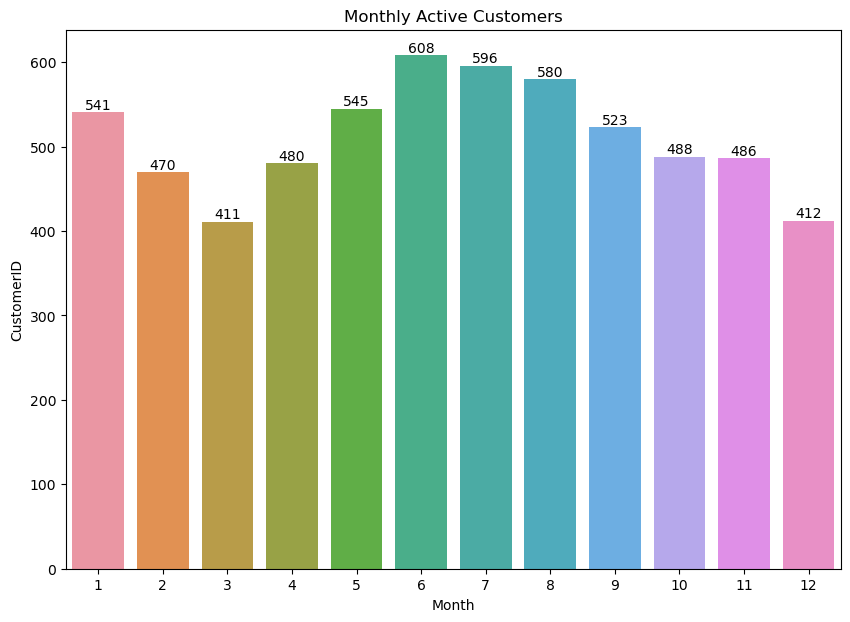

In [46]:
# Monthly active customers
df_monthly_active=df.groupby('Month')['CustomerID'].nunique().reset_index()

# Plotting a barplot for monthly active customers
fig,axes=plt.subplots(figsize=(10,7))
ax=sns.barplot(x='Month',y='CustomerID',data=df_monthly_active)
ax.set_title('Monthly Active Customers')
for bars in ax.containers:
    ax.bar_label(bars)

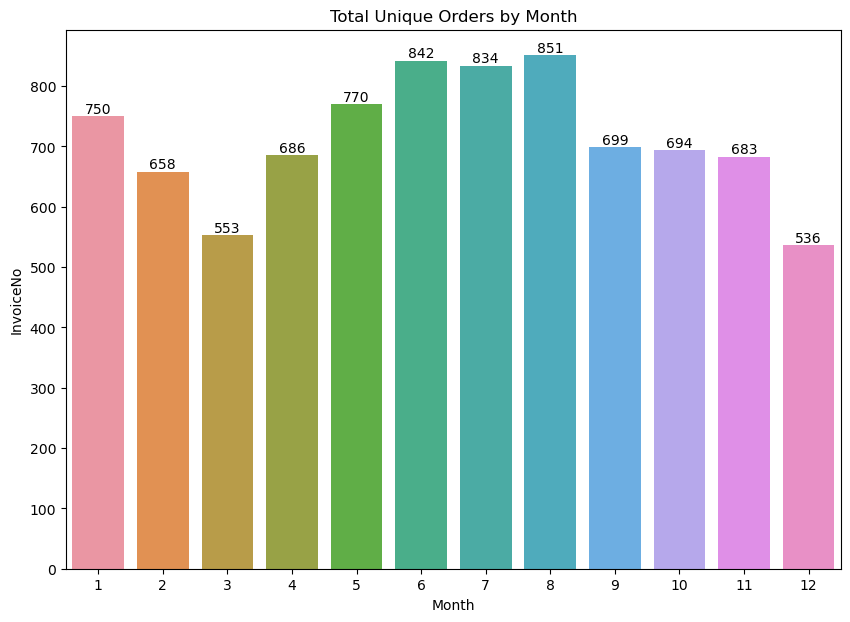

In [47]:
# Total unique orders by month
df_unique_order=df.groupby('Month')['InvoiceNo'].nunique().reset_index()

# Plotting a barplot for total unique orders by month
fig,axes=plt.subplots(figsize=(10,7))
ax=sns.barplot(x='Month',y='InvoiceNo',data=df_unique_order)
ax.set_title('Total Unique Orders by Month')
for bars in ax.containers:
    ax.bar_label(bars)

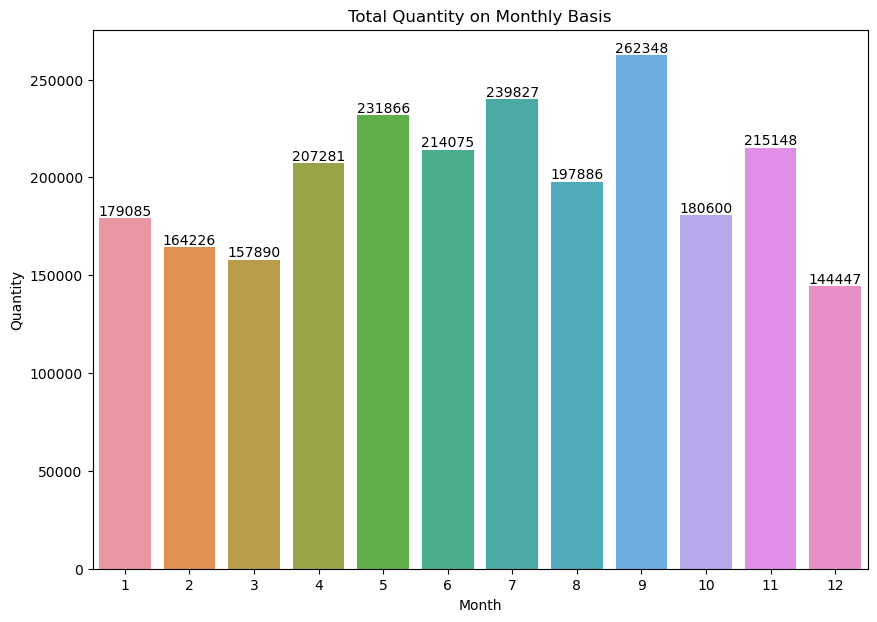

In [48]:
# Total quantity on monthly basis
df_order_sales=df.groupby('Month')['Quantity'].sum().reset_index()

# Plotting a barplot for total quantity on monthly basis
fig,axes=plt.subplots(figsize=(10,7))
ax=sns.barplot(x='Month',y='Quantity',data=df_order_sales)
ax.set_title('Total Quantity on Monthly Basis')
for bars in ax.containers:
    ax.bar_label(bars)

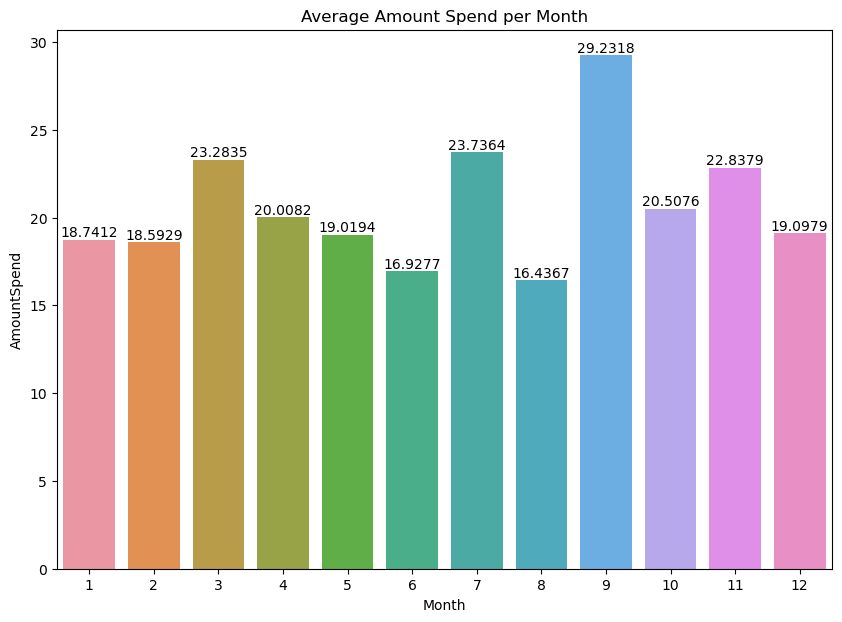

In [49]:
# Average amount spend per month
df_average_amount_spend=df.groupby('Month')['AmountSpend'].mean().reset_index()

# Plotting a barplot for average amount per month
fig,axes=plt.subplots(figsize=(10,7))
ax=sns.barplot(x='Month',y='AmountSpend',data=df_average_amount_spend)
ax.set_title('Average Amount Spend per Month')
for bars in ax.containers:
    ax.bar_label(bars)

### 5. Feature Engineering

In [50]:
# Creating new features
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Extracting more date-related features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

# Data Scaling and Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Defining features and target variable
X = df[['Quantity', 'UnitPrice', 'Country', 'Year', 'Month', 'Day', 'Hour']]
y = df['TotalPrice']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df.head()

,InvoiceNo,InvoiceDate,Date,Month,Year,SKU,Description,Quantity,UnitPrice,AmountSpend,CustomerID,Country,TotalPrice,Day,Hour
0,536365,2010-01-12 08:26:00,2010-01-12,1,2010,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,32,15.30,12,8
1,536365,2010-01-12 08:26:00,2010-01-12,1,2010,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,32,20.34,12,8
2,536365,2010-01-12 08:26:00,2010-01-12,1,2010,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,32,22.00,12,8
3,536365,2010-01-12 08:26:00,2010-01-12,1,2010,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,32,20.34,12,8
4,536365,2010-01-12 08:26:00,2010-01-12,1,2010,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,32,20.34,12,8


### 6. Machine Learning Models

In [51]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initializing and training the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making predictions
y_pred_lrtest = lr_model.predict(X_test)
y_pred_lrtrain = lr_model.predict(X_train)

# Evaluating the model
mse_lrtest = mean_squared_error(y_test, y_pred_lrtest)
mse_lrtrain = mean_squared_error(y_train, y_pred_lrtrain)
r2_lrtest = r2_score(y_test, y_pred_lrtest)
r2_lrtrain = r2_score(y_train, y_pred_lrtrain)

print(f"Linear Regression - MSE train: {mse_lrtrain}, R2: {r2_lrtrain}")
print(f"Linear Regression - MSE test: {mse_lrtest}, R2: {r2_lrtest}")

Linear Regression - MSE train: 12363.69978368839, R2: 0.9365710959494951
Linear Regression - MSE test: 3513.0816424204527, R2: 0.17153169698567117


In [52]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Initializing and training the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Making predictions
y_pred_dttest = dt_model.predict(X_test)
y_pred_dttrain = dt_model.predict(X_train)

# Evaluating the model
mse_dttest = mean_squared_error(y_test, y_pred_dttest)
mse_dttrain = mean_squared_error(y_train, y_pred_dttrain)
r2_dttest = r2_score(y_test, y_pred_dttest)
r2_dttrain = r2_score(y_train, y_pred_dttrain)

print(f"Decision Tree - MSE train: {mse_dttrain}, R2: {r2_dttrain}")
print(f"Decision Tree - MSE test: {mse_dttest}, R2: {r2_dttest}")

Decision Tree - MSE train: 1.2904239796389824e-26, R2: 1.0
Decision Tree - MSE test: 115.14212614220261, R2: 0.9728467449493234


In [53]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Initializing and training the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_rftest = rf_model.predict(X_test)
y_pred_rftrain = rf_model.predict(X_train)

# Evaluating the model
mse_rftest = mean_squared_error(y_test, y_pred_rftest)
mse_rftrain = mean_squared_error(y_train, y_pred_rftrain)
r2_rftest = r2_score(y_test, y_pred_rftest)
r2_rftrain = r2_score(y_train, y_pred_rftrain)

print(f"Random Forest - MSE train: {mse_rftrain}, R2: {r2_rftrain}")
print(f"Random Forest - MSE test: {mse_rftest}, R2: {r2_rftest}")


Random Forest - MSE train: 20168.121742745552, R2: 0.896532439214738
Random Forest - MSE test: 173.64365795652918, R2: 0.9590506907384793


In [54]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Initializing and training the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Making predictions
y_pred_gbtest = gb_model.predict(X_test)
y_pred_gbtrain = gb_model.predict(X_train)

# Evaluating the model
mse_gbtest = mean_squared_error(y_test, y_pred_gbtest)
mse_gbtrain = mean_squared_error(y_train, y_pred_gbtrain)
r2_gbtest = r2_score(y_test, y_pred_gbtest)
r2_gbtrain = r2_score(y_train, y_pred_gbtrain)

print(f"Gradient Boosting - MSE train: {mse_gbtrain}, R2: {r2_gbtrain}")
print(f"Gradient Boosting - MSE test: {mse_gbtest}, R2: {r2_gbtest}")


Gradient Boosting - MSE train: 123.62481030492168, R2: 0.9993657734846135
Gradient Boosting - MSE test: 454.39474561703264, R2: 0.8928428991645632


### 7. Model Evaluation

               Model           MSE  R2 Score
0  Linear Regression  1.236370e+04  0.936571
1      Decision Tree  1.290424e-26  1.000000
2      Random Forest  2.016812e+04  0.896532
3  Gradient Boosting  1.236248e+02  0.999366


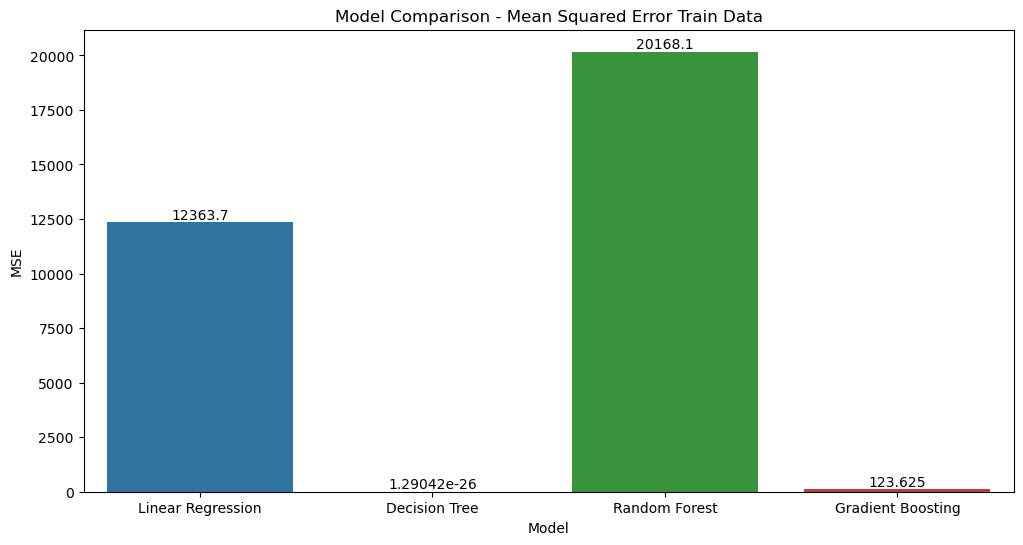

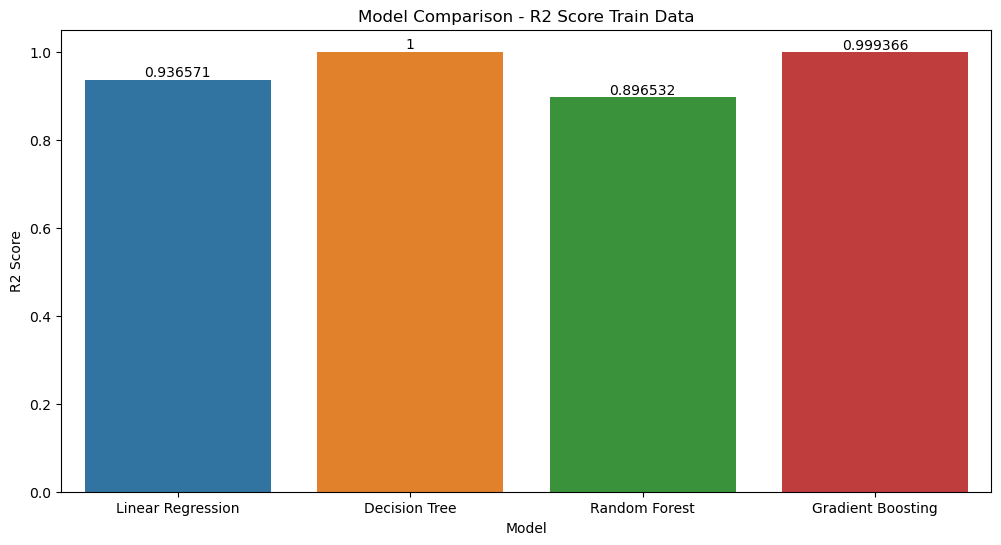

In [55]:
# Summarizing the train data results
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse_lrtrain, mse_dttrain, mse_rftrain, mse_gbtrain],
    'R2 Score': [r2_lrtrain, r2_dttrain, r2_rftrain, r2_gbtrain]
}

results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
ax=sns.barplot(x='Model',y='MSE',data=results_df)
ax.set_title('Model Comparison - Mean Squared Error Train Data')
for bars in ax.containers:
    ax.bar_label(bars)

plt.figure(figsize=(12, 6))
ax=sns.barplot(x='Model',y='R2 Score',data=results_df)
ax.set_title('Model Comparison - R2 Score Train Data')
for bars in ax.containers:
    ax.bar_label(bars)





               Model          MSE  R2 Score
0  Linear Regression  3513.081642  0.171532
1      Decision Tree   115.142126  0.972847
2      Random Forest   173.643658  0.959051
3  Gradient Boosting   454.394746  0.892843


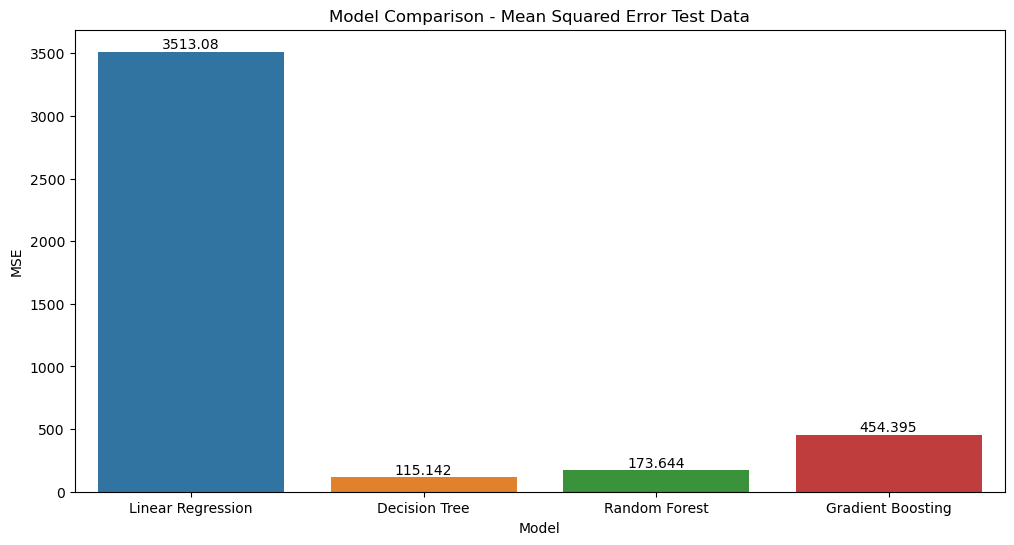

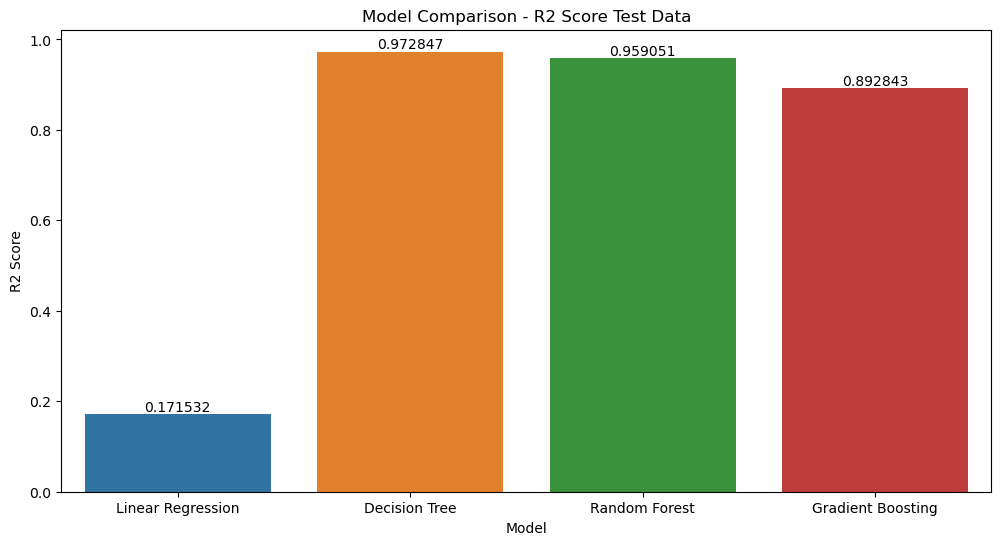

In [56]:
# Summarizing the test data results
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse_lrtest, mse_dttest, mse_rftest, mse_gbtest],
    'R2 Score': [r2_lrtest, r2_dttest, r2_rftest, r2_gbtest]
}

results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12,6))
ax=sns.barplot(x='Model',y='MSE',data=results_df)
ax.set_title('Model Comparison - Mean Squared Error Test Data')
for bars in ax.containers:
    ax.bar_label(bars)

plt.figure(figsize=(12,6))
ax=sns.barplot(x='Model',y='R2 Score',data=results_df)
ax.set_title('Model Comparison - R2 Score Test Data')
for bars in ax.containers:
    ax.bar_label(bars)



